# Diode

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import curve_fit

In [124]:
def kapazität(f_r,L):
    '''Widerstand nicht relevant bei Bestimmung der Resonanzfrequenz???'''
    return 1.0/(4*np.pi**2*f_r**2*L)
    # return (1/((2*np.pi*f_r)**2+R*R/4/L/L))/L

def kapazität_error(f_r,delta_f_r,L):
    return delta_f_r/(2*np.pi**2*f_r**3*L)

def cap_model(C_0,U_s,U):
    '''Minus weicht von Anleitung ab, beschreibt aber die Messwerte...'''
    return U_s*C_0/(U_s-U)

In [125]:
R = 1.0e3
L = 64.0e-3
C_0 = 100.0e-12
U_s = 0.3     # Schwellspannung der Diode

V_off = np.array([-700,-630,-560,-490,-420,-350,-280,-210,-140,-70,0,30,60,90,120,150,180,210,240,270,300])*1.0e-3     # Millivolt!!!
f_r = np.array([73.75,73.32,72.12,71.67,71.105,68.865,68.29,67.355,65.755,65.045,62.115,61.315,60.42,59.405,58.35,57.03,55.445,53.08,49.00,41.40,27.50])*1.0e3   # Messdaten in Kilohertz!!!
f_r_err = np.array([0.13,0.12,0.12,0.12,0.135,0.125,0.8,0.115,0.085,0.095,0.165,0.115,0.130,0.115,0.120,0.160,0.265,0.560,0.800,1.400,2.000])*1.0e3   # Messdaten in Kilohertz!!!

cap = kapazität(f_r,L)
cap_error = kapazität_error(f_r,f_r_err,L)
print(cap)
print(cap[10])
print(cap_error)

[7.27672965e-11 7.36233164e-11 7.60937265e-11 7.70522776e-11
 7.82816566e-11 8.34570800e-11 8.48684096e-11 8.72409946e-11
 9.15382752e-11 9.35475576e-11 1.02581090e-10 1.05275382e-10
 1.08417365e-10 1.12153876e-10 1.16246147e-10 1.21689623e-10
 1.28746524e-10 1.40474812e-10 1.64842096e-10 2.30918968e-10
 5.23353221e-10]
1.0258109017224459e-10
[2.56535554e-13 2.40992852e-13 2.53223716e-13 2.58023533e-13
 2.97251210e-13 3.02973499e-13 1.98842371e-12 2.97905557e-13
 2.36658912e-13 2.73257529e-13 5.44985265e-13 3.94900722e-13
 4.66542782e-13 4.34229300e-13 4.78133254e-13 6.82810440e-13
 1.23069092e-12 2.96405030e-12 5.38259907e-12 1.56177079e-11
 7.61241049e-11]


C:\Users\ebel1\AppData\Local\Temp\ipykernel_23480\2341902113.py:11: RuntimeWarning: divide by zero encountered in true_divide
  return U_s*C_0/(U_s-U)


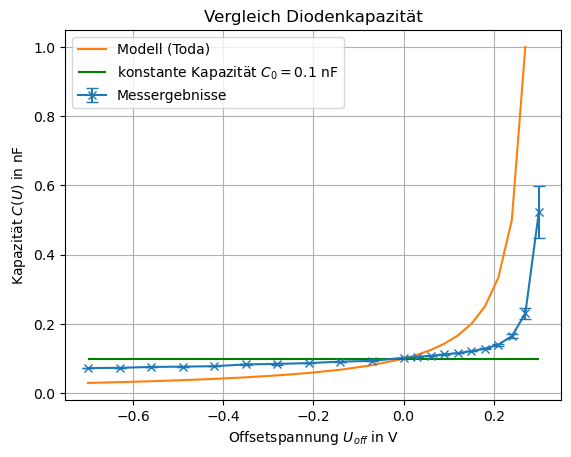

In [126]:
ax = plt.subplots()

plt.errorbar(V_off,cap*1.0e9,yerr=cap_error*1.0e9,marker='x',capsize=4,label='Messergebnisse')
plt.plot(V_off,cap_model(C_0,0.3,V_off)*1.0e9,label='Modell (Toda)')
plt.hlines(C_0*1.0e9,xmin=-0.7,xmax=0.3,color='green',label='konstante Kapazität $C_0=0.1$ nF')

plt.xlabel('Offsetspannung $U_{off}$ in V')
plt.ylabel('Kapazität $C(U)$ in nF')
plt.grid()
plt.legend()
plt.title('Vergleich Diodenkapazität')
plt.savefig('figures/Diodenkapazität.pdf')

Irgendwie sehe ich noch nicht ganz, warum die Resonanzfrequenz nur $\frac{1}{\sqrt{LC}}$ sein soll. Erklärung in Folien auf Overleaf.  
Numerische Integration über Trapezmethode:

In [127]:
Q = integrate.cumulative_trapezoid(cap,V_off,initial=0.0)
print(Q)

V = integrate.cumulative_trapezoid(V_off,Q,initial=0.0)
print(V)

[0.00000000e+00 5.12367145e-12 1.03637680e-11 1.57238781e-11
 2.11605658e-11 2.68214216e-11 3.27128137e-11 3.87366429e-11
 4.49939173e-11 5.14719215e-11 5.83364241e-11 6.14542712e-11
 6.46596624e-11 6.79682310e-11 7.13942314e-11 7.49632679e-11
 7.87198102e-11 8.27581302e-11 8.73378838e-11 9.32742998e-11
 1.04588383e-10]
[ 0.00000000e+00 -3.40724152e-12 -6.52509894e-12 -9.33915676e-12
 -1.18128497e-11 -1.39922791e-11 -1.58480677e-11 -1.73239058e-11
 -1.84189288e-11 -1.90991193e-11 -1.93393769e-11 -1.92926092e-11
 -1.91483666e-11 -1.89002239e-11 -1.85404939e-11 -1.80586739e-11
 -1.74388445e-11 -1.66513721e-11 -1.56209275e-11 -1.41071414e-11
 -1.08826278e-11]


In [128]:
'''Bedenke das Minus, das abweicht von dem Ausdruck für die Kapazität aus der Anleitung???'''
'''Anfangswerte richtig einbauen...'''

def Ladung_model(C_0,U_s,U):
    '''Minus im log weicht von Anleitung ab, hängt von der Definition der Spannung ab. 
    Minus durch die Ableitung des Logarithmus.'''
    return C_0*U_s*(np.log(U_s)-np.log(U_s-U))

def Spannung_model(C_0,U_s,Q):
    '''Warum hauen Anfangsbedingung nicht hin???'''
    # return U_s*(np.exp(Q/C_0/U_s)-1)
    return U_s*(1-np.exp(-Q/C_0/U_s))
    
def toda(C_0,U_s,Q):
    return C_0*U_s*U_s*(np.exp(-Q/C_0/U_s)+Q/C_0/U_s-1)

def U_diode(x):
    return U_s*(np.exp(x/C_0/U_s)-1)

# Welche Kurven brauche ich eigentlich genau???  
Muss noch die Toda-DGL, bzw. die Taylor-Näherung mit rein???  
Fehler beim numerischen Integrieren???

C:\Users\ebel1\AppData\Local\Temp\ipykernel_23480\650781543.py:7: RuntimeWarning: divide by zero encountered in log
  return C_0*U_s*(np.log(U_s)-np.log(U_s-U))


[106.27024464   0.96545826]
[[ 0.40219266 -0.02059561]
 [-0.02059561  0.00138744]]
[0.63418661 0.03724841]


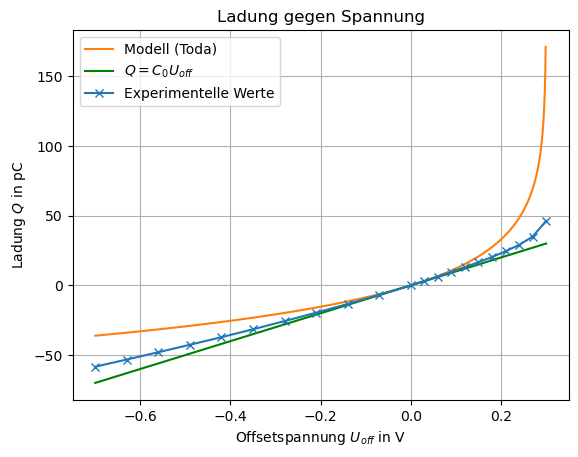

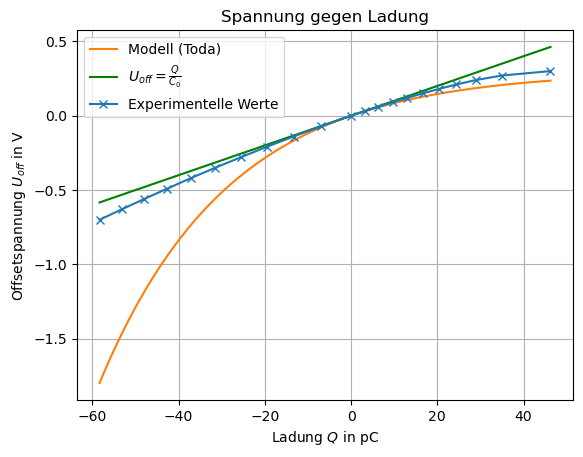

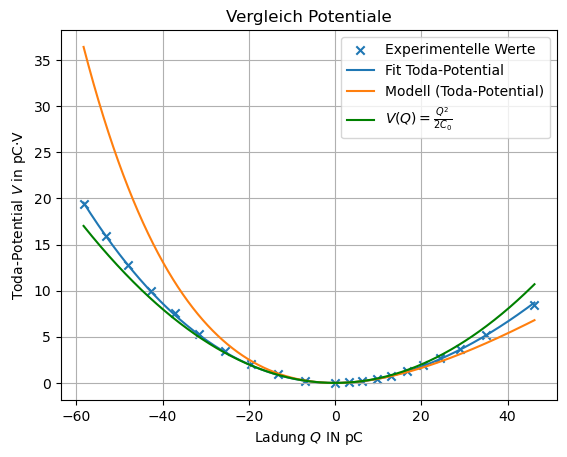

In [129]:
# Wähle Anfangsbedingung so, dass für eine Spannung von 0 V keine Ladung vorliegt.
# Korrekte Anfangsbedingung für Modell wählen
Q0 = -Q[10]
U_lin = np.linspace(-0.7,0.3,1000)
Q_lin = np.linspace(Q[0]+Q0,Q[-1]+Q0,1000)
#print(Q[0]+Q0)
#print(Q[-1]+Q0)

def func_Q(C_0,U):
    return C_0*U
def func_U(C_0,Q):
    return Q/C_0
def func_V(C_0,Q):
    return Q*Q/2/C_0

ax = plt.subplots()
plt.errorbar(V_off,(Q+Q0)*1.0e12,marker='x',label='Experimentelle Werte')
plt.plot(U_lin,(Ladung_model(C_0,U_s,U_lin))*1.0e12,label='Modell (Toda)')
plt.plot(U_lin,func_Q(C_0,U_lin)*1.0e12,color='green',label='$Q=C_0U_{off}$')
plt.title('Ladung gegen Spannung')
plt.legend()
plt.grid()
plt.xlabel('Offsetspannung $U_{off}$ in V')
plt.ylabel('Ladung $Q$ in pC')
plt.savefig('figures/ladung_vs_spannung.pdf')


ax = plt.subplots()
plt.errorbar((Q+Q0)*1.0e12,V_off,marker='x',label='Experimentelle Werte')
plt.plot(Q_lin*1.0e12,Spannung_model(C_0,U_s,Q_lin),label='Modell (Toda)')
plt.plot(Q_lin*1.0e12,func_U(C_0,Q_lin),color='green',label=r'$U_{off}=\frac{Q}{C_0}$')
#print(Q_lin)
#print(Spannung_model(C_0,U_s,Q_lin))
plt.title('Spannung gegen Ladung')
plt.legend()
plt.grid()
plt.xlabel('Ladung $Q$ in pC')
plt.ylabel('Offsetspannung $U_{off}$ in V')
plt.savefig('figures/spannung_vs_ladung.pdf')

# Lege Potential so, dass für Ladung von 0 kein Potential vorliegt
V0 = -V[10]

# Fit machen für experimentelles Tode-Potential
# Integrationskonstante Toda machen, Theorie so machen, dass es passt

def toda_fit(x,C_fit,U_fit):
    return C_fit*U_fit*U_fit*(np.exp(-x/C_fit/U_fit)+x/C_fit/U_fit-1)

def toda_fit2(x,A,alpha):
    return A*(np.exp(-alpha*x)+alpha*x-1)

popt, pcov = curve_fit(toda_fit,(Q+Q0)*1e12,(V+V0)*1e12,[100,0.5])
C_fit = popt[0]
U_fit = popt[1]
pstd = np.sqrt(np.diag(pcov))

print(popt)
print(pcov)
print(pstd)
# print(toda_fit(C_fit,U_fit,Q_lin*1e12))

ax = plt.subplots()
plt.scatter((Q+Q0)*1e12,(V+V0)*1e12,marker='x',label='Experimentelle Werte')
plt.plot(Q_lin*1e12,toda_fit(Q_lin*1e12,C_fit,U_fit),label='Fit Toda-Potential')
plt.plot(Q_lin*1e12,toda(C_0,U_s,Q_lin)*1e12,label='Modell (Toda-Potential)')
plt.plot(Q_lin*1e12,func_V(C_0,Q_lin)*1e12,color='green',label=r'$V(Q)=\frac{Q^2}{2C_0}$')

plt.title('Vergleich Potentiale')
plt.xlabel('Ladung $Q$ IN pC')
plt.ylabel('Toda-Potential $V$ in pC$\cdot$V')
plt.legend()
plt.grid()
plt.savefig('figures/potential.pdf')

Lissajous-Figuren und andere nützliche Plots...

In [130]:
def plot(data,channel):
    '''Channel als CH1, CH2 oder XY'''
    if channel == 'CH1':
        i = 1
        j = 2
    if channel == 'CH2':
        i = 4
        j = 5
    if channel == 'XY':
        i = 2
        j = 5
    ax = plt.subplots()
    plt.scatter(data[i],data[j],marker='x')
    plt.grid()

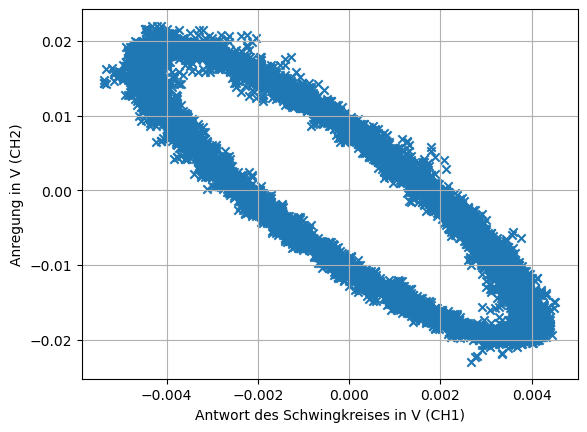

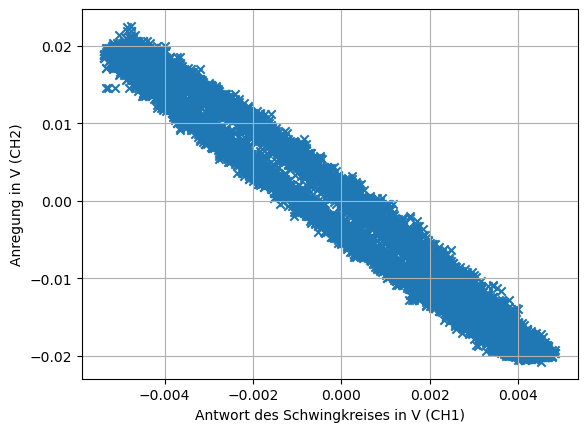

In [131]:
# Indizes 1,2 und 4,5 scheinen die relevanten zu sein...
ellipse = np.genfromtxt('data/Diode/csv_offset0_ellipse.csv',delimiter=',',usecols=(1,3,4,7,9,10)).T
gerade= np.genfromtxt('data/Diode/csv_offset0_gerade.csv',delimiter=',',usecols=(1,3,4,7,9,10)).T

plot(ellipse,'XY')
plt.xlabel('Antwort des Schwingkreises in V (CH1)')
plt.ylabel('Anregung in V (CH2)')
plt.savefig('figures/ellipse.pdf')
plot(gerade,'XY')
plt.xlabel('Antwort des Schwingkreises in V (CH1)')
plt.ylabel('Anregung in V (CH2)')
plt.savefig('figures/gerade.pdf')